In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
# sys.path.append('/Users/zzhang/Workspace/SpyDust/')
sys.path.append('/Users/user/projects/SpyDust/')

from SpyDust.Grain import *

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/user/projects/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


/Users/user/projects/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


## Grain size and shape distribution

In [2]:
grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=True, normalize=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab

## An example of the angular momentum distribution: 
### $f(\Omega|a, \beta, \mu)$  (given grain properties)

In [3]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [4]:
from SpyDust.util import cgsconst
from SpyDust.AngMomDist import log_f_rot
from SpyDust.charge_dist import charge_dist

debye = cgsconst.debye
env = CNM_params
dip_per_at = env['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
print(a, beta)

5.3382803478865665e-08 -0.3425


### $\beta$

In [5]:
beta

np.float64(-0.3425)

In [6]:
a_tab

array([3.63692806e-08, 3.92706459e-08, 4.24034681e-08, 4.57862116e-08,
       4.94388141e-08, 5.33828035e-08, 5.76414253e-08, 6.22397794e-08,
       6.72049679e-08, 7.25662551e-08, 7.83552398e-08, 8.46060418e-08,
       9.13555025e-08, 9.86434026e-08, 1.06512696e-07, 1.15009764e-07,
       1.24184686e-07, 1.34091540e-07, 1.44788714e-07, 1.56339257e-07,
       1.68811247e-07, 1.82278192e-07, 1.96819464e-07, 2.12520768e-07,
       2.29474647e-07, 2.47781025e-07, 2.67547796e-07, 2.88891465e-07,
       3.11937828e-07, 3.36822719e-07])

Text(0.5, 0, '$\\log \\Omega$')

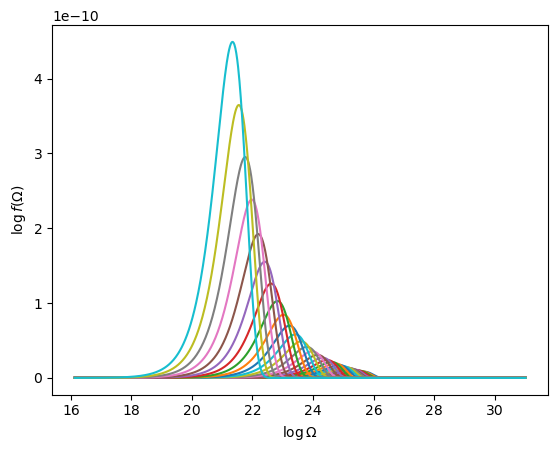

In [7]:
env = WNM_params
# fZ = charge_dist(env, a, beta)
# Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
# mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
# mu_ip = np.array([mu_rms * np.sqrt(ip)])
# mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
#log_omegas, log_f_rot = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000) 

for a in a_tab:
    fZ = charge_dist(env, a, beta)
    Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
    mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
    mu_ip = np.array([mu_rms * np.sqrt(ip)])
    mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
    omegas, log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)
    plt.plot(omegas, np.exp(log_rot_dist[0]))
#plt.xscale('log')
plt.ylabel(r'$\log f(\Omega)$')
plt.xlabel(r'$\log \Omega$')
#plt.ylim(-60, -10)


In [8]:
from SpyDust_ME.util import homogeneous_dist
from full_Stokes import full_Stokes_SED

In [9]:
class spdust_conditional_SED:
    def __init__(self, obs_omegas, int_dist_func=homogeneous_dist, ext_dist_func=homogeneous_dist, impulse=None):
        self.obs_omegas = obs_omegas
        self.int_dist_func = int_dist_func
        self.ext_dist_func = ext_dist_func
        self.impulse = impulse

    @staticmethod
    def generate_loglog_rot_dist_func(env, a, beta, mu, ip):
        fZ = charge_dist(env, a, beta)
        mu_ip = np.array([mu * np.sqrt(ip)])
        mu_op = np.array([mu * np.sqrt(1 - ip)])
        log_Omegas, log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)
        return log_Omegas, log_rot_dist[0]

    def generate(self, env, a, beta, mu, ip):
        self.log_omegas, self.log_rot_dist = self.generate_loglog_rot_dist_func(env, a, beta, mu, ip)
        spdust_model = full_Stokes_SED(rot_freq_grid=self.log_omegas, rot_dist_grid=self.log_rot_dist,
                                       log_freq=True, log_dist=True)
        result = spdust_model.generate_SED(self.obs_omegas, beta, ip, mu**2,
                                            internal_dist=self.int_dist_func, 
                                            impulse=self.impulse,
                                            external_dist=self.ext_dist_func, 
                                            max_workers=1, 
                                            full_Stokes=False)

        return result

In [10]:
obs_omegas_min = 2*np.pi*3e9
obs_omegas_max = 2*np.pi*3e11
obs_omegas_num = 1000
obs_omegas = makelogtab(obs_omegas_min , obs_omegas_max , obs_omegas_num)

spd_model = spdust_conditional_SED(obs_omegas)

In [11]:
debye = cgsconst.debye
env = CNM_params
dip_per_at = env['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)

In [12]:
spd_SED = spd_model.generate(CNM_params, a, beta, mu_rms, 2/3)

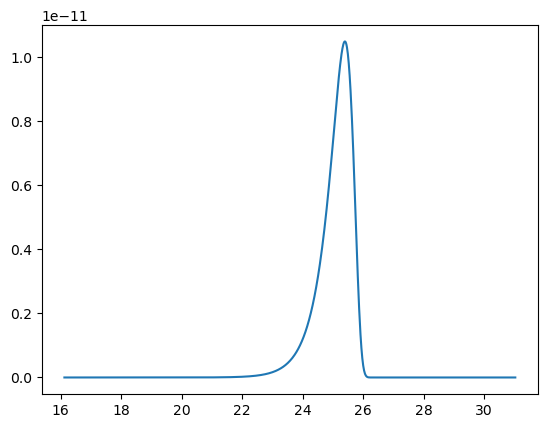

In [13]:
plt.plot(spd_model.log_omegas, np.exp(spd_model.log_rot_dist))
#plt.ylim(-100, 10)

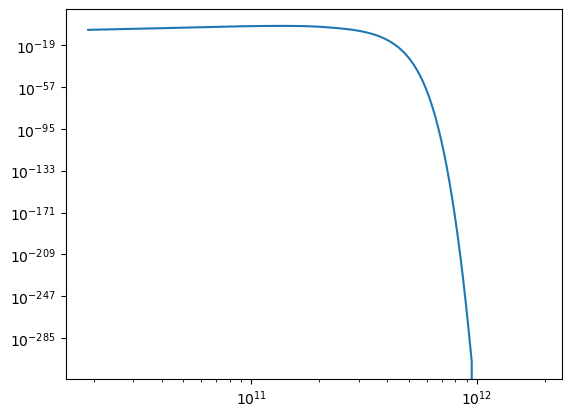

In [14]:
plt.plot(obs_omegas, spd_SED)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1e-20, 1e-1)

## Perturbative SEDs

In [ ]:

CNM_perturbed_nh = {'nh' : 40, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_T = {'nh' : 30, 'T': 150., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_Chi = {'nh' : 30, 'T': 100., 'Chi': 1.5, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xh = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.8e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_xC = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 4e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_y = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0.3, 'gamma': 0, 'dipole': 9.3, 'line':7}
CNM_perturbed_gamma = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0.3, 'dipole': 9.3, 'line':7}
CNM_perturbed_dipole = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 10.5, 'line':7}

In [25]:
spd_SED_0 = spd_model.generate(CNM_params, a, beta, mu_rms, 2/3)

spd_SED_perturbed_a = spd_model.generate(CNM_params, 0.9*a, beta, mu_rms, 2/3)
spd_SED_perturbed_beta = spd_model.generate(CNM_params, a, 0.9*beta, mu_rms, 2/3)
spd_SED_perturbed_mu = spd_model.generate(CNM_params, a, beta, 0.9*mu_rms, 2/3)
spd_SED_perturbed_ip = spd_model.generate(CNM_params, a, beta, mu_rms, 0.9*2/3)

spd_SED_deri_a = (spd_SED_perturbed_a - spd_SED_0) / (-0.1 * a)
spd_SED_deri_beta = (spd_SED_perturbed_beta - spd_SED_0) / (-0.1 * beta)
spd_SED_deri_mu = (spd_SED_perturbed_mu - spd_SED_0) / (-0.1 * mu_rms)
spd_SED_deri_ip = (spd_SED_perturbed_ip - spd_SED_0) / (-0.1 * ip)


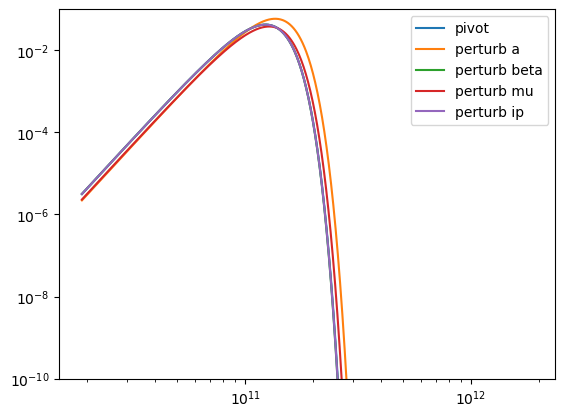

In [28]:
plt.plot(obs_omegas, spd_SED_0, label='pivot')
plt.plot(obs_omegas, spd_SED_perturbed_a, label='perturb a')
plt.plot(obs_omegas, spd_SED_perturbed_beta, label='perturb beta')
plt.plot(obs_omegas, spd_SED_perturbed_mu, label='perturb mu')
plt.plot(obs_omegas, spd_SED_perturbed_ip, label='perturb ip')

plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-10, 1e-1)

plt.legend()

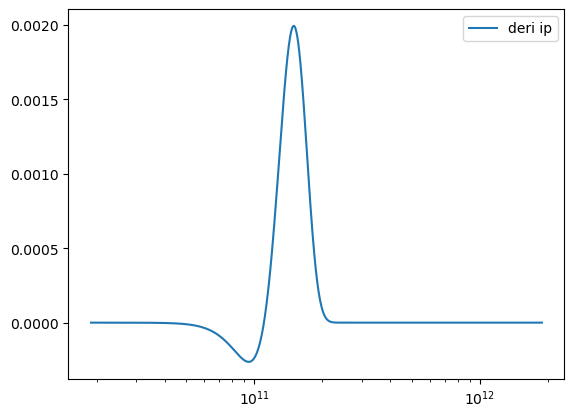

In [33]:
#plt.plot(obs_omegas, spd_SED_deri_a, label='deri a')
#plt.plot(obs_omegas, spd_SED_deri_beta, label='deri beta')
#plt.plot(obs_omegas, spd_SED_deri_mu, label='deri mu')
plt.plot(obs_omegas, spd_SED_deri_ip, label='deri ip')

plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-10, 1e-1)

plt.legend()

## Multiply with dipole, average over Gaussian dipole ensemble: 
$\tilde{f}_\perp(\Omega | a, \beta) \equiv  \int \mu_\perp^2 f(\Omega, \boldsymbol{\mu} | a, \beta ) \mathrm{d}^3\mu$

5.3382803478865665e-08 -0.04749999999999999


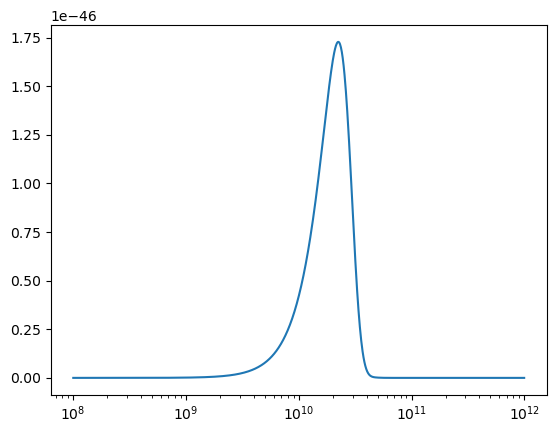

In [15]:
from SpyDust.SED import mu2_f_cond, mu2_f, SED
aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmin(f_a_beta[aind, :])]
print(a, beta)

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])

mu2_f_cond_1, mu2_f_cond_2 = mu2_f_cond(env, a, beta, fZ, mu_rms, ip, 10, omega_min=1e8, omega_max=1e13, Nomega=1000)

omega = makelogtab(1e8, 1e12, 1000)
plt.plot(omega, mu2_f_cond_1+mu2_f_cond_2, label='ip')
#plt.plot(omega, mu2_f_cond_2, label='op', linestyle='--')
plt.xscale('log')

### Further marginalize the grain size
$\tilde{f}_\perp(\Omega, \beta) = \int \mathrm{d}a f(a, \beta) \tilde{f}_\perp(\Omega | a, \beta) $

In [16]:
mu2_f_mu_ensem = mu2_f(env, a_tab, beta_tab, f_a_beta, dip_per_at, ip, 10, omega_min=1e8, omega_max=1e15, Nomega=1000)

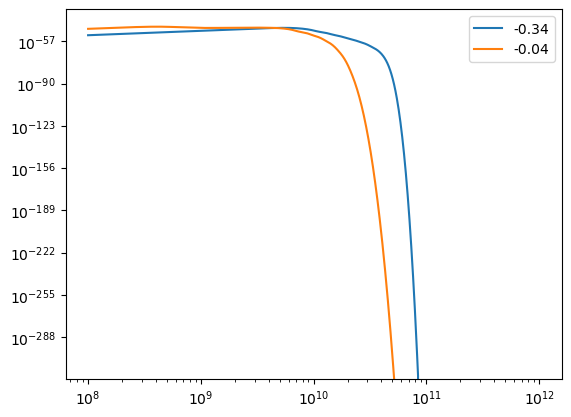

In [17]:
for i in range(len(beta_tab)):
    plt.plot(omega, mu2_f_mu_ensem[i, 0, :], label=str(beta_tab[i])[:5])
    plt.xscale('log')
    plt.yscale('log')
plt.legend()

### Example SED of the given environment 

In [18]:
from SpyDust.SpyDust import SpyDust
min_freq=1 # in GHz
max_freq=200 # in GHz
n_freq=200
aux_SED = SpyDust(CNM_params, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq)

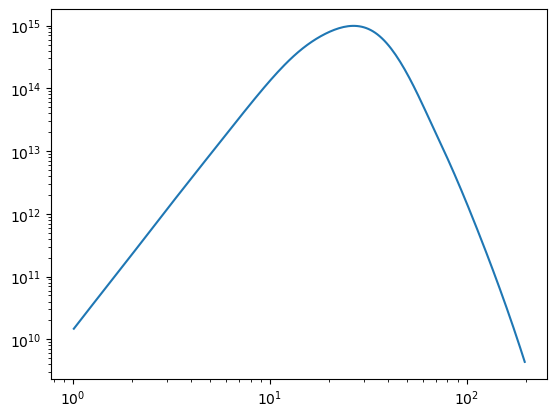

In [19]:
plt.loglog(aux_SED[0,:], aux_SED[1,:])

## Given specific dipole


5.3382803478865665e-08 -0.04749999999999999


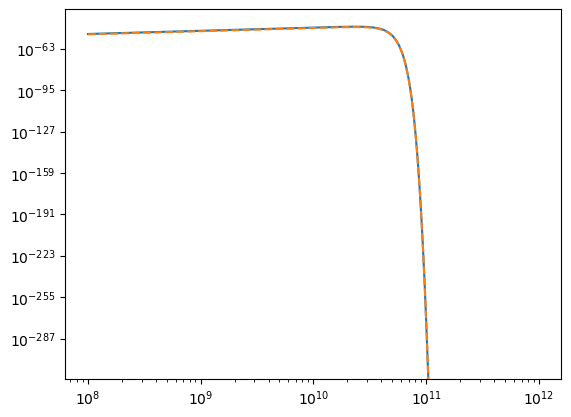

In [20]:
from SpyDust.SED import mu2_f_cond, mu2_f, SED
aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmin(f_a_beta[aind, :])]
print(a, beta)

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])

mu2_f_cond_1, mu2_f_cond_2 = mu2_f_cond(env, a, beta, fZ, mu_rms, ip, 1, omega_min=1e8, omega_max=1e13, Nomega=1000)

omega = makelogtab(1e8, 1e12, 1000)
plt.loglog(omega, mu2_f_cond_1, label='ip')
plt.loglog(omega, mu2_f_cond_2, label='op', linestyle='--')

In [21]:
mu2_f_given_mu = mu2_f(env, a_tab, beta_tab, f_a_beta, dip_per_at, ip, 1, omega_min=1e8, omega_max=1e15, Nomega=1000)

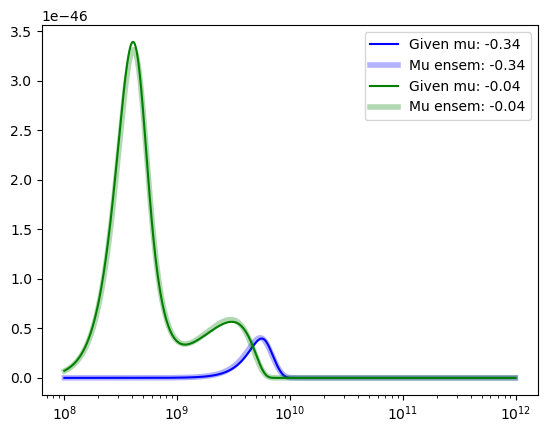

In [22]:
colors = ['blue', 'green', 'orange', 'purple', 'black']
for i in range(len(beta_tab)):
    plt.plot(omega, mu2_f_given_mu[i, 0, :], label="Given mu: "+str(beta_tab[i])[:5], color=colors[i], ls='-')
    plt.plot(omega, mu2_f_mu_ensem[i, 0, :], label="Mu ensem: "+str(beta_tab[i])[:5], color=colors[i], linewidth=4, alpha=0.3)
    plt.xscale('log')
plt.legend()

In [23]:
mu_sq_f_given_mu=np.sum(mu2_f_given_mu, axis=1)
mu_sq_f_mu_ensem=np.sum(mu2_f_mu_ensem, axis=1)
mu_sq_f_mu_ensem.shape

(2, 1000)

In [24]:
from full_Stokes import full_Stokes_SED
# spd_beta_0 = full_Stokes_SED(Omega_grid=omega, rot_dist_grid=mu_sq_f_given_mu[0])
# spd_beta_1 = full_Stokes_SED(Omega_grid=omega, rot_dist_grid=mu_sq_f_given_mu[1])
inds_0 = np.where(mu_sq_f_given_mu[0]>0)[0]
inds_1 = np.where(mu_sq_f_given_mu[1]>0)[0]
spd_beta_0 = full_Stokes_SED(log_Omega_grid=np.log(omega[inds_0]), log_rot_dist_grid=np.log(mu_sq_f_given_mu[0, inds_0]/(mu_rms**2)))
spd_beta_1 = full_Stokes_SED(log_Omega_grid=np.log(omega[inds_1]), log_rot_dist_grid=np.log(mu_sq_f_given_mu[0, inds_1]/(mu_rms**2)))


TypeError: full_Stokes_SED.__init__() got an unexpected keyword argument 'log_Omega_grid'

In [ ]:
beta_tab

array([-0.3425, -0.0475])

In [ ]:
from util import homogeneous_dist

obs_omegas = np.arange(1, 60, 0.1)*1e9/2*np.pi

full_stokes_result_0=spd_beta_0.generate_SED(obs_omegas, beta_tab[0], 2/3, 1,
                                                internal_dist=homogeneous_dist, 
                                                external_dist=homogeneous_dist, 
                                                max_workers=1, 
                                                full_Stokes=False)
full_stokes_result_1=spd_beta_1.generate_SED(obs_omegas, beta_tab[1], 2/3, 1,
                                                internal_dist=homogeneous_dist, 
                                                impulse=1,
                                                external_dist=homogeneous_dist, 
                                                max_workers=1, 
                                                full_Stokes=False)

In [ ]:
beta_tab

array([-0.3425, -0.0475])

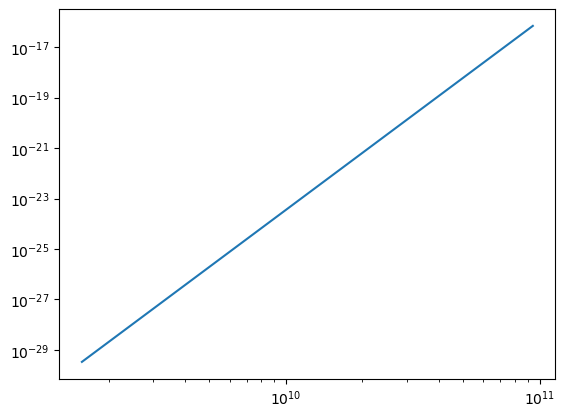

In [ ]:
plt.loglog(obs_omegas, full_stokes_result_1[:])
#plt.ylim(1e-30, 1e-5)

In [ ]:
np.exp(np.log(109))

np.float64(108.99999999999997)